### Инициализируем класс графа и класс вершины графа, заполняем граф по условию

In [163]:
# Описывает граф, содержащий в себе все страницы
class Graph:
	def __init__(self, nodes: dict = {}):
		self.nodes = nodes

	def add_node(self, value):
		if value not in self.nodes:
			node = Node(value)
			self.nodes[value] = node

	def add_edge(self, from_node, to_node):
		if from_node in self.nodes and to_node in self.nodes:
			self.nodes[from_node].add_child(Node(to_node))

# Описывает отдельную страницу
class Node:
	def __init__(self, value, weight=1):
		self.value = value
		# авторитетность страницы
		self.weight = weight
		# страницы, на которые ссылается данная
		self.children = []

	def add_child(self, child_node):
		self.children.append(child_node)

# Граф Б

# graph = Graph()
# for node in ["A", "B", "C", "D", "E", "F", "G", "H"]:
# 	graph.add_node(node)

# graph.add_edge("A", "B")
# graph.add_edge("A", "C")
# graph.add_edge("B", "D")
# graph.add_edge("B", "E")
# graph.add_edge("C", "F")
# graph.add_edge("C", "G")
# graph.add_edge("D", "A")
# graph.add_edge("D", "H")
# graph.add_edge("E", "A")
# graph.add_edge("E", "H")
# graph.add_edge("F", "A")
# graph.add_edge("G", "A")
# graph.add_edge("H", "A")

# Граф A рисунок 6

# graph = Graph()
# for node in ["A", "B", "C", "D", "E", "G", "H"]:
# 	graph.add_node(node)

# graph.add_edge("A", "B")
# graph.add_edge("A", "C")
# graph.add_edge("B", "D")
# graph.add_edge("B", "E")
# graph.add_edge("C", "G")
# graph.add_edge("D", "E")
# graph.add_edge("D", "H")
# graph.add_edge("E", "A")
# graph.add_edge("E", "C")
# graph.add_edge("E", "H")
# graph.add_edge("H", "E")

# Граф Б рисунок 6

graph = Graph()
for node in ["A", "B", "C", "D", "E", "F", "G", "H"]:
	graph.add_node(node)

graph.add_edge("A", "B")
graph.add_edge("A", "C")
graph.add_edge("B", "D")
graph.add_edge("B", "E")
graph.add_edge("C", "G")
graph.add_edge("C", "F")
graph.add_edge("D", "E")
graph.add_edge("D", "H")
graph.add_edge("E", "A")
graph.add_edge("E", "C")
graph.add_edge("E", "H")
graph.add_edge("F", "G")
graph.add_edge("G", "F")
graph.add_edge("H", "E")


print(graph.nodes)

{'A': <__main__.Node object at 0x00000162CA3C3E10>, 'B': <__main__.Node object at 0x00000162C5872250>, 'C': <__main__.Node object at 0x00000162C983E310>, 'D': <__main__.Node object at 0x00000162C983F910>, 'E': <__main__.Node object at 0x00000162CA38F490>, 'F': <__main__.Node object at 0x00000162CA38CF50>, 'G': <__main__.Node object at 0x00000162CA38FFD0>, 'H': <__main__.Node object at 0x00000162CA38EED0>}


### Функция, реализующая алгоритм Basic PageBank

In [164]:
import pandas as pd

def PageBank(raw_graph, iter=3, chosen_iters: tuple = ()):
	# все страницы
	nodes = raw_graph.nodes
	# словарь с результатами итераций 
	results = {i: [] for i in nodes.keys()}
	results["Iter"] = []
	# добавочный коээфициент
	p = 0.5

	for it in range(1, iter+1):
		spotted = []
		# начальные авторитетности каждой страницы
		weights = {value: node.weight for value, node in nodes.items()}
		for value, node in nodes.items():
			# число страниц, за которые голосует рассматриваемая страница
			votes = len(node.children)
			# если страница никому не отдает голос, пропускаем ее
			if votes == 0:
				continue
			# рассчитываем конечный вес ее голоса
			weight = weights[value]
			added_weight = p + weight / votes
			
			for child in node.children:
				# если голос суммируется в первый раз, 
				# то меняем предыдущий авторитет страницы на него
				if child.value in spotted:
					nodes[child.value].weight += added_weight
				else:
					spotted.append(child.value)
					nodes[child.value].weight = added_weight
		# авторитетности, получившиеся после итерации
		new_weights = {value: node.weight for value, node in nodes.items()}
		# добавляем значения в словарь с результатами
		results["Iter"].append(it)
		for node_value, weight in new_weights.items():
			results[node_value].append(weight)
		# вывод значений на нужных нам итерациях
		if len(chosen_iters) != 0 and it in chosen_iters:
			print(f"--- iter {it} ends with: \n weights: {new_weights} \n sum: {sum(new_weights.values())}")
	results = pd.DataFrame(results)
	results.set_index("Iter", inplace=True)
	return (Graph(nodes), results)


### Получение графа после итераций функции

In [165]:
new_graph, res = PageBank(raw_graph=graph, iter=5000, chosen_iters=(1, 2, 3, 4, 5, 1000, 5000))


--- iter 1 ends with: 
 weights: {'A': 0.8333333333333333, 'B': 1.0, 'C': 1.8333333333333333, 'D': 1.0, 'E': 3.5, 'F': 2.5, 'G': 2.5, 'H': 1.8333333333333333} 
 sum: 15.0
--- iter 2 ends with: 
 weights: {'A': 1.6666666666666667, 'B': 0.9166666666666666, 'C': 2.5833333333333335, 'D': 1.0, 'E': 4.333333333333333, 'F': 4.416666666666666, 'G': 4.416666666666666, 'H': 2.666666666666667} 
 sum: 22.0
--- iter 3 ends with: 
 weights: {'A': 1.9444444444444444, 'B': 1.3333333333333335, 'C': 3.2777777777777777, 'D': 0.9583333333333333, 'E': 5.125, 'F': 6.708333333333333, 'G': 6.708333333333333, 'H': 2.9444444444444446} 
 sum: 29.0
--- iter 4 ends with: 
 weights: {'A': 2.208333333333333, 'B': 1.4722222222222223, 'C': 3.6805555555555554, 'D': 1.1666666666666667, 'E': 5.590277777777779, 'F': 9.347222222222221, 'G': 9.347222222222221, 'H': 3.1874999999999996} 
 sum: 36.0
--- iter 5 ends with: 
 weights: {'A': 2.3634259259259265, 'B': 1.6041666666666665, 'C': 3.967592592592593, 'D': 1.23611111111111

In [4]:
res

,A,B,C,D,E,F,G,H
Iter,,,,,,,,
1,4.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000
2,2.500000,2.000000,2.000000,0.250000,0.250000,0.250000,0.250000,0.500000
3,1.250000,1.250000,1.250000,1.000000,1.000000,1.000000,1.000000,0.250000
4,3.250000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,1.000000
5,2.875000,1.625000,1.625000,0.312500,0.312500,0.312500,0.312500,0.625000
...,...,...,...,...,...,...,...,...
996,2.461538,1.230769,1.230769,0.615385,0.615385,0.615385,0.615385,0.615385
997,2.461538,1.230769,1.230769,0.615385,0.615385,0.615385,0.615385,0.615385
998,2.461538,1.230769,1.230769,0.615385,0.615385,0.615385,0.615385,0.615385


### Построение графика

Text(0, 0.5, 'Авторитетность')

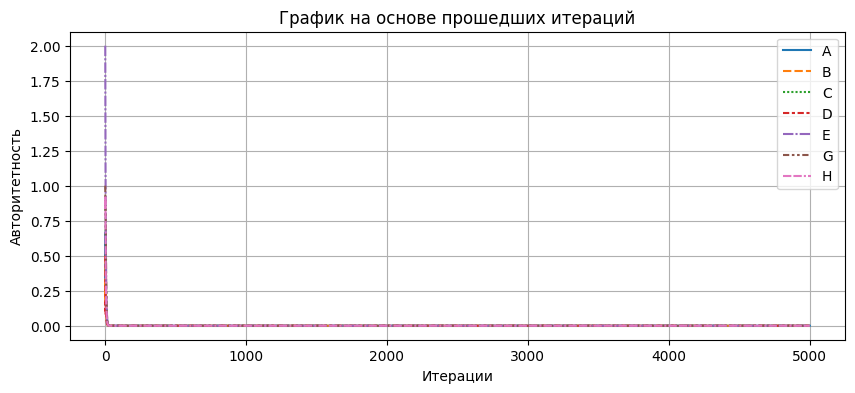

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10,4))

sns.lineplot(data=res, legend="auto")

plt.grid(True)
plt.title('График на основе прошедших итераций')
plt.xlabel('Итерации')
plt.ylabel('Авторитетность')

# plt.savefig("line-1.png")

Построим более наглядные графики

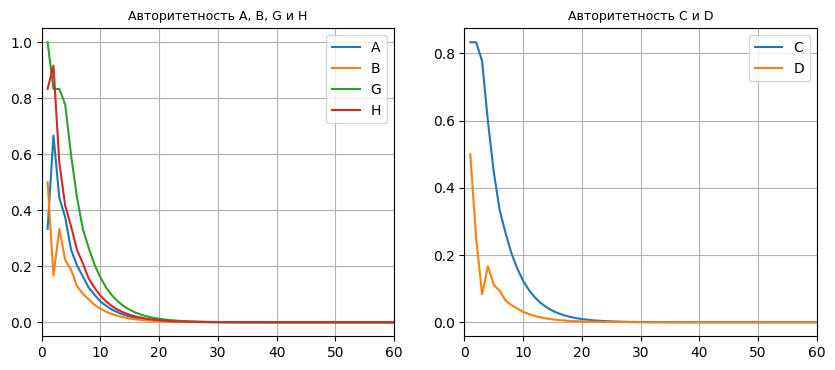

In [149]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))

axes[0].set_title('Авторитетность A, B, G и H', fontsize=9)
axes[1].set_title('Авторитетность C и D', fontsize=9)
# plt.grid(True)
plt.xlim(0, 60)

axes[0].plot(res[["A", "B", "G", "H"]], label=["A", "B", "G", "H"])
axes[0].legend()
axes[0].grid(True)

axes[1].plot(res[["C", "D"]], label=["C", "D"])
axes[1].legend()
axes[1].grid(True)

# plt.savefig("line-2.png")


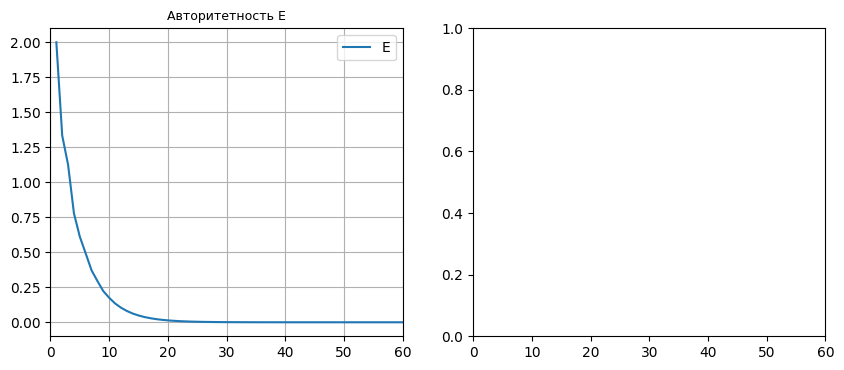

In [150]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].set_title('Авторитетность E', fontsize=9)

# plt.grid(True)
plt.xlim(0, 60)

axes[0].plot(res[["E"]], label=["E"])
axes[0].legend()
axes[0].grid(True)


# plt.savefig("line-3.png")

### BFS и DFS

In [2]:
from queue import deque

# graph = {"A": ["B", "C"],
# 				 "B": ["E", "D"],
# 				 "C": ["G", "F"],
# 				 "D": ["H", "A"],
# 				 "E": ["H", "A"],
# 				 "F": ["A"],
# 				 "G": ["A"],
# 				 "H": ["A"]}

graph = {"A": ["B", "C", "D", "G"],
				 "B": ["A", "D", "E"],
				 "C": ["A", "G"],
				 "D": ["A", "B"],
				 "E": ["A", "H"],
				 "F": ["A", "H"],
				 "G": ["A", "C"],
				 "H": ["E", "F"]}

def bfs(graph, start):
	visited, queue = [], deque([start])
	while queue:
			vertex = queue.pop()
			if vertex not in visited:
					visited.append(vertex)
					queue.extendleft(set(graph[vertex]) - set(visited))
	return visited


def dfs(graph, start):
	visited, stack = [], [start]
	while stack:
			vertex = stack.pop()
			if vertex not in visited:
					visited.append(vertex)
					stack.extend(set(graph[vertex]) - set(visited))
					print(vertex, stack, visited)
	return visited

print(dfs(graph, 'A'))

A ['G', 'D', 'B', 'C'] ['A']
C ['G', 'D', 'B', 'G'] ['A', 'C']
G ['G', 'D', 'B'] ['A', 'C', 'G']
B ['G', 'D', 'D', 'E'] ['A', 'C', 'G', 'B']
E ['G', 'D', 'D', 'H'] ['A', 'C', 'G', 'B', 'E']
H ['G', 'D', 'D', 'F'] ['A', 'C', 'G', 'B', 'E', 'H']
F ['G', 'D', 'D'] ['A', 'C', 'G', 'B', 'E', 'H', 'F']
D ['G', 'D'] ['A', 'C', 'G', 'B', 'E', 'H', 'F', 'D']
['A', 'C', 'G', 'B', 'E', 'H', 'F', 'D']
